  Using cached numpy-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Num GPUs Available: 0
Epoch 1/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9152 - loss: 0.2794 - val_accuracy: 0.9878 - val_loss: 0.0371
Epoch 2/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9867 - loss: 0.0431 - val_accuracy: 0.9881 - val_loss: 0.0364
Epoch 3/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9913 - loss: 0.0270 - val_accuracy: 0.9876 - val_loss: 0.0366
Epoch 4/4
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9933 - loss: 0.0201 - val_accuracy: 0.9914 - val_loss: 0.0254
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9895 - loss: 0.0314
Test Accuracy: 0.9914000034332275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted Digit: 9


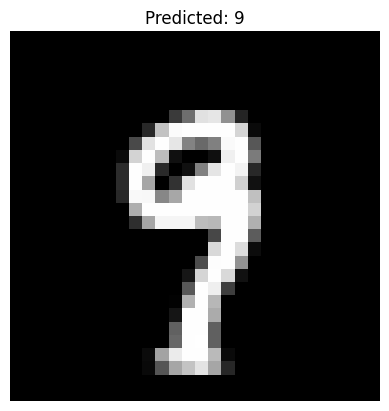

In [ ]:

# Install and upgrade required libraries (if needed)
!pip install --upgrade tensorflow numpy matplotlib pandas

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Check if GPU is available (optional, speeds up training)
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

# Load MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize data (scale pixel values between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape data for CNN (Add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with fewer epochs to avoid memory issues
model.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Predict a random digit
index = np.random.randint(0, len(X_test))
# index = np.where(y_test == 5)[0][0]
sample = np.expand_dims(X_test[index], axis=0)  # Ensure batch dimension
predicted_label = np.argmax(model.predict(sample))
print("Predicted Digit:", predicted_label)

# Show the image
plt.imshow(X_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
model.save("mnist.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Digit: 7


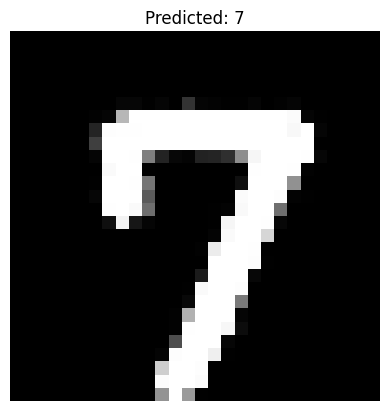

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the trained model

model = tf.keras.models.load_model("/content/mnist.h5")  # Save the model after training

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28 (same as MNIST dataset)
    img = cv2.resize(img, (28, 28))

    # Invert colors (MNIST has white digits on black background)
    img = 255 - img

    # Normalize pixel values (0 to 1 range)
    img = img / 255.0

    # Reshape to fit the model input shape (28,28,1)
    img = img.reshape(1, 28, 28, 1)

    return img

# Function to predict digit from an image
def predict_digit(image_path):
    img = preprocess_image(image_path)  # Preprocess the image
    prediction = model.predict(img)  # Get model predictions
    predicted_label = np.argmax(prediction)  # Get the highest probability class
    print("Predicted Digit:", predicted_label)

    # Display the image
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage
image_path = "/content/HANDWRITTEN7.jpg"  # Replace with your image path
predict_digit(image_path)
